# VIPCCA tutorial
intruduction


### Importing VIPCCA

In [12]:
import vipcca.vipcca as vip
import vipcca.preprocessing as pp
import vipcca.plotting as pl

### load data

In [ ]:
test_result_path = '/Users/zhongyuanke/data/vipcca/'
r1="/Users/zhongyuanke/data/vipcca/293t.h5ad"
r2="/Users/zhongyuanke/data/vipcca/jurkat.h5ad"
r4="/Users/zhongyuanke/data/vipcca/mixed.h5ad"

adata_b1 = pp.read_sc_data(r1, batch_name="293t")
adata_b2 = pp.read_sc_data(r2, batch_name="jurkat")
adata_b3 = pp.read_sc_data(r4, batch_name="mixed")

### Data preprocessing

In [15]:
adata_all = pp.preprocessing([adata_b1, adata_b2, adata_b3], index_unique="-",)

/Users/zhongyuanke/anaconda3/envs/test-vipcca/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/Users/zhongyuanke/anaconda3/envs/test-vipcca/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
/Users/zhongyuanke/anaconda3/envs/test-vipcca/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
/Users/zhongyuanke/anaconda3/envs/test-vi

### Do integration

In [16]:
# construct a vipcca object
handle = vip.VIPCCA(
    adata_all=adata_all,
    res_path=test_result_path,
    mode=mode,split_by="_batch",
    epochs=2,
    lambda_regulizer=lambda_regulizer,
    batch_input_size=batch_input_size,
    batch_input_size2=batch_input_size2
)
# do integration and return an AnnData
adata_integrate = handle.fit_transform()

/Users/zhongyuanke/anaconda3/envs/test-vipcca/lib/python3.7/site-packages/keras/engine/training_utils.py:819: UserWarning: Output decoder_mlp missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder_mlp.
  'be expecting any data to be passed to {0}.'.format(name))


Model: "vae_mlp"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 2000)         0                                            
__________________________________________________________________________________________________
batch_input1 (InputLayer)       (None, 128)          0                                            
__________________________________________________________________________________________________
encoder_mlp (Model)             [(None, 16), (None,  318368      encoder_input[0][0]              
                                                                 batch_input1[0][0]               
__________________________________________________________________________________________________
batch_input2 (InputLayer)       (None, 16)           0                                      

... storing '_batch' as categorical
... storing 'celltype' as categorical


In [17]:
adata_integrate

AnnData object with n_obs × n_vars = 9530 × 2000
    obs: '_batch', 'celltype', 'n_genes', 'percent_mito', 'n_counts', 'size_factor', 'batch'
    var: 'gene_ids', 'n_cells-0-0', 'highly_variable-0-0', 'means-0-0', 'dispersions-0-0', 'dispersions_norm-0-0', 'n_cells-1-0', 'highly_variable-1-0', 'means-1-0', 'dispersions-1-0', 'dispersions_norm-1-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_vipcca'

1.The meta.data of each cell has been saved in adata.obs\
2.The embedding representation from vipcca of each cell have been saved in adata.obsm('X_vipcca')

### UMAP Visualization


In [31]:
import matplotlib
matplotlib.use('TkAgg')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

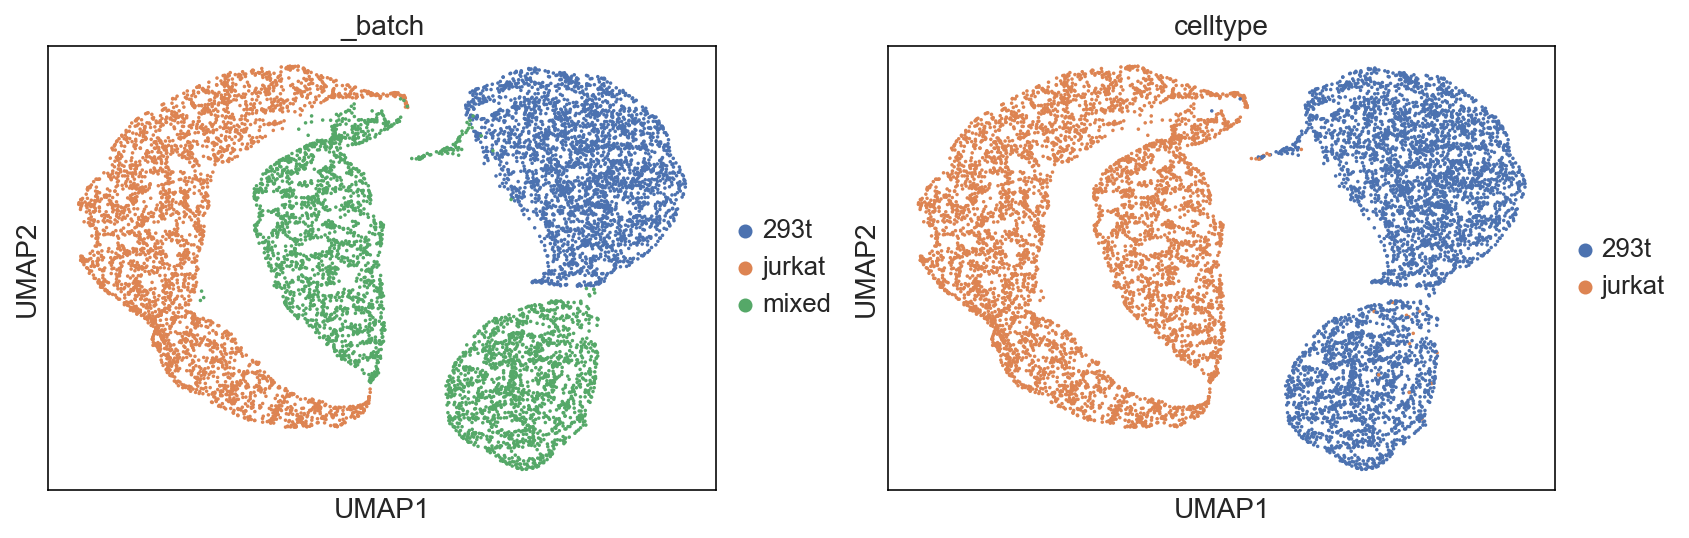

In [36]:
import scanpy as sc
sc.set_figure_params(figsize=[14,5])
%matplotlib inline
sc.pp.neighbors(adata_integrate,use_rep='X_vipcca')
sc.tl.umap(adata_integrate)

sc.pl.umap(adata_integrate, color=['_batch','celltype'],use_raw=False,show=True,)
